In [47]:
from colormath.color_objects import LabColor, XYZColor, sRGBColor
from colormath.color_conversions import convert_color
from colr import Colr as C
import random as r

# THIS NOTEBOOK IS THE FIRST ATTEMPT AT COLOR
def lab_to_rgb(a, b, c):
    lab = LabColor(a,b,c)
    rgb = convert_color(lab, sRGBColor)
    r = rgb.clamped_rgb_r * 255
    g = rgb.clamped_rgb_g * 255
    b = rgb.clamped_rgb_b * 255
    return [r,g,b]

    
# it looks slightly different than the initial lab, but when we 
# take the lab result and go back to rgb, the rgb is retained so I guess it's ok?
def rgb_to_lab(a, b, c):
    rgb = sRGBColor(a, b, c, is_upscaled=True)
    xyz = convert_color(rgb, XYZColor, target_illuminant='d50')
    lab = convert_color(xyz, LabColor)
    return lab.get_value_tuple()

def print_combo(fg, bg):
#     print("color", fg)
    for i in range(0,3):
        if fg[i] > 255:
            fg[i] = 255
        if bg[i] > 255:
            bg[i]= 255
    print(C().b_rgb(bg[0], bg[1], bg[2]) .rgb(fg[0], fg[1], fg[2], 'Lorem ipsum.'))

# generates a high contrast color pairing
# lab is l: [0,100] a: [-128, 128] b: [-128, 128]
def generate_two_color():
    light = r.uniform(0, 50)
    dark = light + r.uniform(40, 60)
    if (dark > 100):
        dark = 100;
        
    a1 = r.uniform(-128, 128)
    a2 = r.uniform(-128, 128)
    b1 = r.uniform(-128, 128)
    b2 = r.uniform(-128, 128)
        
    lab1 = LabColor(light, a1, a2)
    lab2 = LabColor(dark, b1, b2)
    rgb1 = lab_to_rgb(lab1.lab_l, lab1.lab_a, lab1.lab_b )
    rgb2 = lab_to_rgb(lab2.lab_l, lab2.lab_a, lab2.lab_b,)
    print_combo(rgb1, rgb2)
    print_combo(rgb2, rgb1)
#     print("light", light, "dark", dark)
    
# for i in range(0, 10):
#     generate_two_color()

# value = input("Please enter a string:\n")
 
# print(f'You entered {value}')

def bound(min_val, max_val, val):
    new_val = val
    if (val > max_val):
         new_val = max_val
    elif (val < min_val):
        new_val = min_val
    return new_val

# LAB FUNCTIONS
def generate_analogous(feature):
    return bound(-128, 128, feature + r.uniform(-10, 10))

def generate_contrast(feature):
    return bound(-128, 128, feature + r.uniform(-100, 100))

In [91]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse


def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()


def generate_based_on_input(samples):
    
    for color in samples:
        lab_c1=[0,0,0]
        lab_c2 = [0,0,0]
        
        lab_c1[0], lab_c1[1], lab_c1[2] = rgb_to_lab(color[0], color[1], color[2])
    
        if lab_c1[0] < 40: # if the sample color is light: generate a dark color
            lab_c2[0] = lab_c1[0] + r.uniform(40, 60)
        elif lab_c1[0] >= 40: # generate a light color
            lab_c2[0] = lab_c1[0] - r.uniform(40, 60)

        # error checking
        lab_c2[0] = bound(0, 100, lab_c2[0])
        ## these two colors should be generated base off
        ## y/b and r/g go from -128 to 128
        lab_c2[2] = generate_contrast(lab_c1[1])
        lab_c2[2] = generate_analogous(lab_c1[2])

        lab1 = LabColor(lab_c1[0], lab_c1[1],lab_c1[2])
        lab2 = LabColor(lab_c2[0], lab_c2[1],lab_c2[2])
        rgb1 = lab_to_rgb(lab1.lab_l, lab1.lab_a, lab1.lab_b )
        rgb2 = lab_to_rgb(lab2.lab_l, lab2.lab_a, lab2.lab_b,)
        print_combo(rgb1, rgb2)
#         print_combo(rgb2, rgb1)

#     print("light", light, "dark", dark)


inputs: 
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
generated palettes
15.260436706524306 71.61993467845222
Lorem ipsum.
14.587917324273647 58.97085958215717
Lorem ipsum.
16.17511205523885 74.28487753166422
Lorem ipsum.
16.106228308720766 68.8134062351729
Lorem ipsum.
17.42902923559506 69.99357286737339
Lorem ipsum.
14.763894106864601 56.39489624625014
Lorem ipsum.
16.590760508424417 72.53824413641672
Lorem ipsum.
15.711046899544097 62.10067574232649
Lorem ipsum.
14.27392707692756 71.99712942442221
Lorem ipsum.
16.76523193753423 61.48199238740293
Lorem ipsum.
16.505608843981612 69.10148542463477
Lorem ipsum.
14.896216639085413 67.25658106064671
Lorem ipsum.
16.16684478590797 62.69917378043683
Lorem ipsum.
15.590567986525699 69.57674958364007
Lorem ipsum.
16.365791057119132 57.89482869997073
Lorem ipsum.
16.133205450682283 73.359822965556
Lorem ipsum.
16.997383330700103 65.524765245906
Lorem ipsum.
16.345332333606024 65.14175212882975
Lore

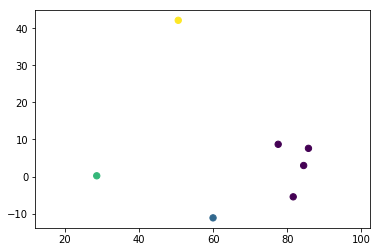

In [92]:

# a list of colors we like in rgb, pastels
pastel = [ [255, 228, 171], [255, 171, 209], [144, 240, 155], [245, 118, 130], [250, 178, 162], [145, 255, 187], [203, 240, 168]]

# a list of earth tones
earth = [ [192, 87, 70], [240, 207, 101], [73, 67, 49], [89, 152, 197], [222, 185, 134], [208, 205, 148], [247, 208, 138]]

lab_likes = []
print("inputs: " )
for color in earth:
    print_combo(color, color)
    lab_likes.append(rgb_to_lab(color[0], color[1], color[2]))

lab_likes = np.reshape(lab_likes, (-1, 3))

# gmm is in RGB space instead of cielab rn
gmm = GaussianMixture(n_components=4).fit(lab_likes)
labels = gmm.predict(lab_likes)
plot_gmm(gmm, lab_likes);  # plots the clustering!

samples = gmm.sample(30)[0]
# print("gaussian outputs:")
# for i in range(0, samples.shape[0]):
#     print_combo(samples[i], samples[i])
    

rgb_sample = []
for color in samples:
    rgb_sample.append(lab_to_rgb(color[0], color[1], color[2]))
print("generated palettes")
generate_based_on_input(samples)



inputs: 
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
generated palettes
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.


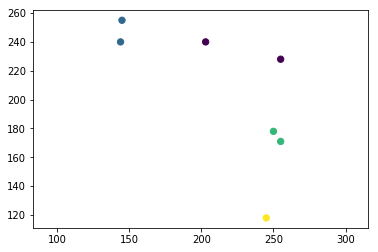